# About the dataset
There are two provided datasets for Netflix Ratings and Imdb Movie Names.
- `movies.csv`: contains movies from Imdb
- `ratings.csv`: contains user ratings from Netflix

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
movies = pd.read_csv('./movies.csv')
ratings = pd.read_csv('./ratings.csv')

# Inspecting the Dataset
Upon inspecing the datasets we can see that:
- `movies.csv` contains `movieId title genres`
- `ratings.csv` contains `userId movieId rating timestamp`

These two datasets are linked via the `movieId` attribute (this is the movieId of the movie in Imdb which coincides in Netflix

In [3]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [4]:
ratings

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


# Activity 1:

## Data cleaning and preprocessing
we are using `df.drop_duplicates()` to drop duplicates from our dataframe

In [5]:
movies = movies.drop_duplicates() #remove duplicates from dataframe
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


we are using OneHotEncoder (from sklearn) to convert `movies['genres']` into onehot encoded form


> One Hot encoder takes categorical data and turns it into numerical data (most commonly binary true and false)



In [6]:
enc = OneHotEncoder(handle_unknown='ignore') # create onehotencoder context
enc.fit(pd.DataFrame(movies['genres']))
encoded_df = enc.transform(pd.DataFrame(movies['genres']))
print(pd.DataFrame(encoded_df))

                     0
0        (0, 337)\t1.0
1        (0, 395)\t1.0
2        (0, 697)\t1.0
3        (0, 650)\t1.0
4        (0, 600)\t1.0
...                ...
10324    (0, 499)\t1.0
10325    (0, 600)\t1.0
10326    (0, 600)\t1.0
10327    (0, 779)\t1.0
10328      (0, 0)\t1.0

[10329 rows x 1 columns]


# Activity 2:

## Numpy & Pandas Operations

We are asked to compute the average rating per genre.

If we look at our datasets we see that `movies.csv['genre']` contains entires seperated by `|`.

So we first merge the both datasets and split the genres by `|` and then compute the average rating using the unwrapped "exploded" dataframe

In [7]:
merged_df = pd.merge(ratings, movies, on='movieId', how='inner')

merged_df['genres'] = merged_df['genres'].str.split('|')
exploded_df = merged_df.explode('genres')

average_rating_by_genre = exploded_df.groupby('genres')['rating'].mean()

average_rating_by_genre.sort_values(ascending=False)

,rating
genres,
Film-Noir,3.913636
War,3.783202
Mystery,3.652043
Drama,3.650266
Documentary,3.643035
Crime,3.642392
IMAX,3.641821
Animation,3.635350
Musical,3.571962


We create random values for our budget since its not available in our dataset

In [11]:
budget_np=np.random.randint(low=500000,high=20000000,size=10329)
tdf=pd.DataFrame(budget_np)

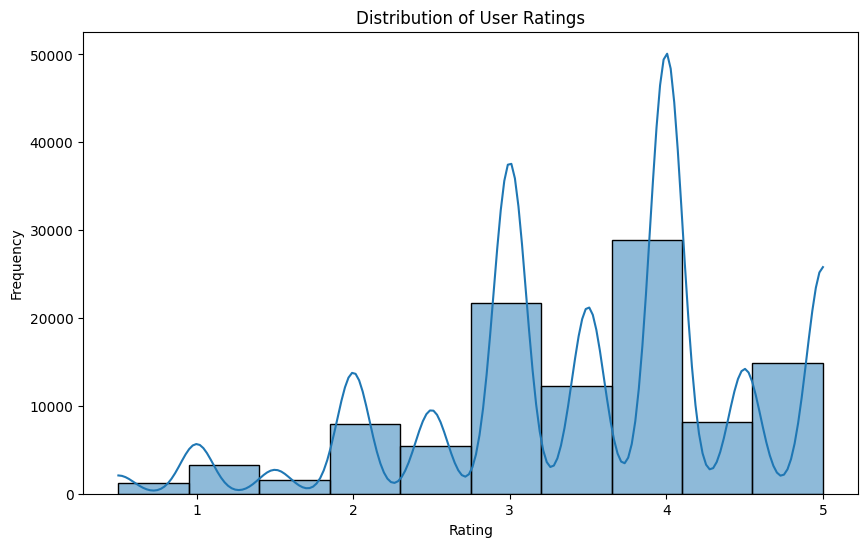

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [17]:
user_item_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating')

user_item_matrix = user_item_matrix.fillna(0)
user_similarity = cosine_similarity(user_item_matrix)

user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

def recommend_movies(user_id, user_similarity_df, user_item_matrix, movies, num_recommendations=5):
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:]  # Exclude the user themself

    rated_movies = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index

    recommendations = []

    for similar_user_id, similarity_score in similar_users.items():
        unrated_movies = user_item_matrix.loc[similar_user_id][~user_item_matrix.loc[similar_user_id].index.isin(rated_movies)][user_item_matrix.loc[similar_user_id] > 0]
        for movie_id, rating in unrated_movies.items():
            recommendations.append((movie_id, rating * similarity_score))

    recommendations.sort(key=lambda x: x[1], reverse=True)

    recommended_movie_ids = [movie_id for movie_id, _ in recommendations[:num_recommendations]]
    recommended_movie_titles = movies[movies['movieId'].isin(recommended_movie_ids)]['title'].tolist()

    return recommended_movie_titles

In [19]:
user_id = 2
recommendations = recommend_movies(user_id, user_similarity_df, user_item_matrix, movies)
print(f"Recommended movies for user {user_id}: {recommendations}")

Recommended movies for user 2: ['Heat (1995)', 'Happy Gilmore (1996)', 'Up Close and Personal (1996)', 'Hunchback of Notre Dame, The (1996)', 'Mother (1996)']


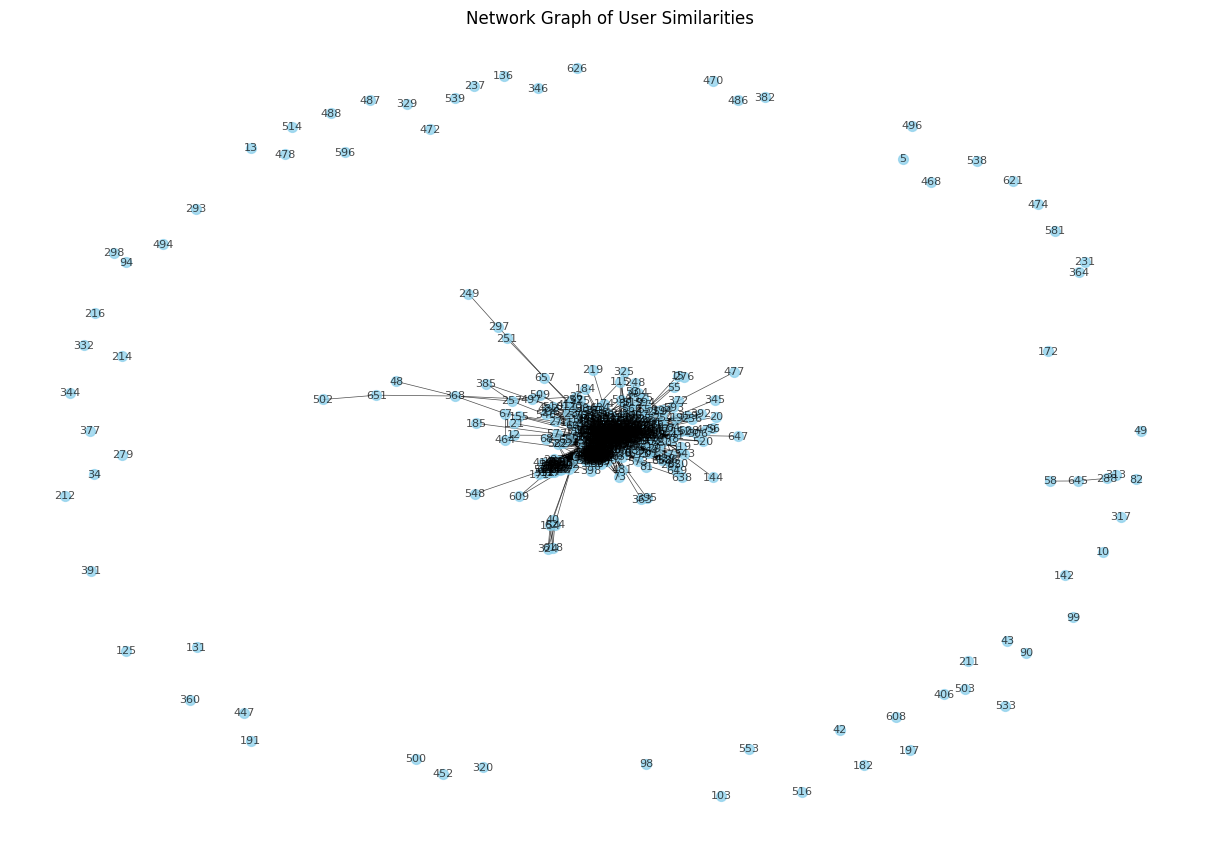

In [16]:
import networkx as nx
import matplotlib.pyplot as plt


graph = nx.Graph()

for user_id in user_similarity_df.index:
    graph.add_node(user_id)

threshold = 0.2
for user_id1 in user_similarity_df.index:
    for user_id2 in user_similarity_df.columns:
        if user_id1 != user_id2 and user_similarity_df.loc[user_id1, user_id2] > threshold:
            graph.add_edge(user_id1, user_id2, weight=user_similarity_df.loc[user_id1, user_id2])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_size=50, node_color='skyblue', font_size=8, alpha=0.7, width=0.5)
plt.title("Network Graph of User Similarities")
plt.show()
